In [1]:
__depends__ = ['../outputs/llc_kuroshio_spectra.nc']
__dest__ = ['../writeup/figs/fig4.pdf','../writeup/figs/S1.pdf']

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset

In [3]:
c1 = 'slateblue'
c2 = 'tomato'
c3 = 'k'
c4 = 'indigo'
plt.rcParams['lines.linewidth'] = 2.5

def leg_width(lg,fs):
    """"  Sets the linewidth of each legend object """
    for legobj in lg.legendHandles:
        legobj.set_linewidth(fs)
        
def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,250.,100.,50.,25.,10.,5.])
    lp=np.array([500,250,100,50,25,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
def set_axes(type='ke'):
    if type=='ke':
        plt.loglog(kr,12.*e2,'.5',linewidth=2)
        plt.loglog(kr,35*e3,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-3,1.e2)
        plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')

    elif type=='ssha':
        plt.loglog(kr,e2/.5e1,'.5',linewidth=2)
        plt.loglog(kr,3*e5/1.5e2,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-6,1.e2)
        plt.ylabel(r'SSH variance density [m$^2$/cpkm]')   
    
    plt.xlabel(r'Wavenumber [cpkm]')


In [4]:
llc = Dataset(__depends__[0])

In [5]:
kr = np.array([1.e-4,1.])
e2 = kr**-2/1.e4
e3 = kr**-3/1.e7
e5 = kr**-5/1.e9

## Figure 4: LLC4320 surface KE and SSHa variance wavenumber spectra

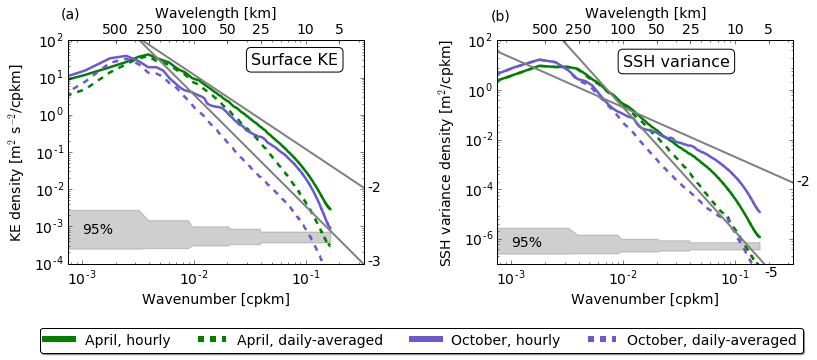

In [6]:
fig = plt.figure(figsize=(13,4.))

ax = fig.add_subplot(121)

plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/april']['E'],color='g',label='April, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/april']['E'],'--',color='g',label='April, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/october']['E'],color=c1,label='October, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/october']['E'],'--',color=c1,label='October, daily-averaged')
plt.text(1./2.8,.09e-1,'-2',fontsize=14)
plt.text(1./2.8,.09e-3,'-3',fontsize=14)

plt.fill_between(llc['CIwavenumber'],llc['E_lower'],llc['E_upper'], color='.25', alpha=0.25)

plt.loglog(kr,12.*e2,'.5',linewidth=2)
plt.loglog(kr,35*e3,'.5',linewidth=2)
plt.xlim(.75e-3,1/3.)
plt.ylim(1.e-3,1.e2)
plt.xlabel(r'Wavenumber [cpkm]')
plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')
 
plt.text(8.e-2, 30, "Surface KE", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.text(.65e-3,400.,'(a)',fontsize=14)
add_second_axis(ax)

plt.ylim(1.e-4,1.e2)
lg = ax.legend(loc=(-0.095,-.4), ncol=4, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

plt.xlim(.75e-3,1/3.)
plt.text(1.e-3,.65e-3,'95%',fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.45, hspace=None)

ax = fig.add_subplot(122)


plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/april']['ESSHa'],color='g',label='April, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/april']['ESSHa'],'--',color='g',label='April, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/october']['ESSHa'],color=c1,label='October, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/october']['ESSHa'],'--',color=c1,label='October, daily-averaged')


plt.fill_between(llc['CIwavenumber'],llc['ESSHa_lower'],llc['ESSHa_upper'], color='.25', alpha=0.25)


plt.text(1./2.8,1.5e-4,'-2',fontsize=14)
plt.text(1./5.5,.3e-7,'-5',fontsize=14)

plt.loglog(kr,e2/.5e1,'.5',linewidth=2)
plt.loglog(kr,3*e5/1.5e2,'.5',linewidth=2)
plt.xlim(.75e-3,1/3.)
plt.ylim(1.e-6,1.e2)
plt.xlabel(r'Wavenumber [cpkm]')
plt.ylabel(r'SSH variance density [m$^2$/cpkm]')
plt.text(3.e-2, 14, "SSH variance", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(1.e-7,1.e2)
plt.xlim(.75e-3,1/3.)
plt.text(.65e-3,700.,'(b)',fontsize=14)
plt.text(1.e-3,.5e-6,'95%',fontsize=14)
plt.yticks([1.e-6,1.e-4,1.e-2,1.e0,1e2])
add_second_axis(ax)

plt.savefig(__dest__[0],bbox_inches='tight')

## Figure S1: A comparison between LLC2160 and LLC4320 spectra

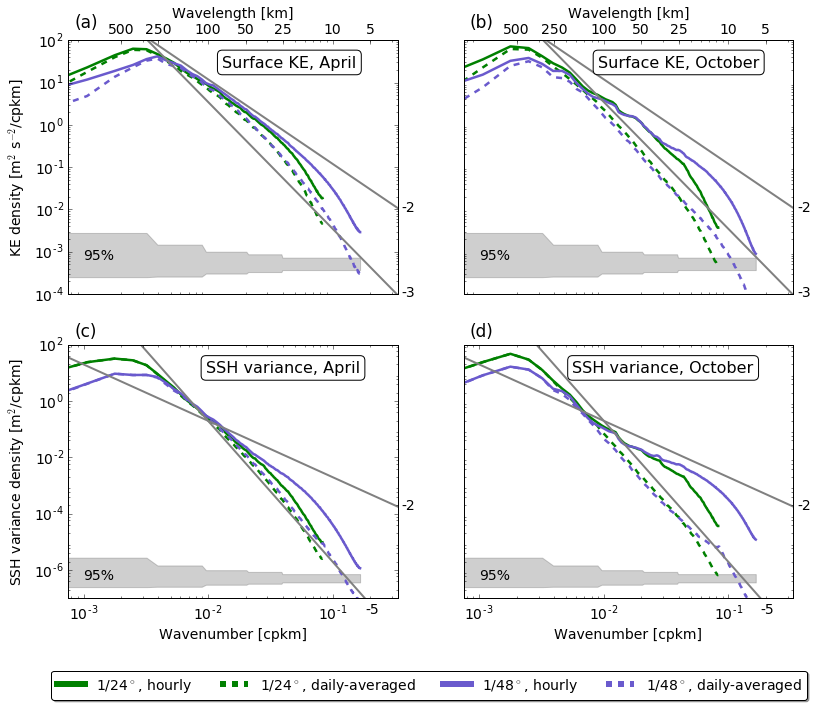

In [7]:
fig = plt.figure(figsize=(13,10))

ax1 = fig.add_subplot(221)

plt.loglog(llc['2160/wavenumber'],llc['2160/hourly/april']['E'],color='g',label=r'1/24$^\circ$, hourly')
plt.loglog(llc['2160/wavenumber'],llc['2160/daily-averaged/april']['E'],'--',color='g',label=r'1/24$^\circ$, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/april']['E'],color=c1,label=r'1/48$^\circ$, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/april']['E'],'--',color=c1,label=r'1/48$^\circ$, daily-averaged')
set_axes(type='ke')
plt.text(4.5e-2, 30, "Surface KE, April", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.xticks([])
plt.xlabel('')

plt.fill_between(llc['CIwavenumber'],llc['E_lower'],llc['E_upper'], color='.25', alpha=0.25)
plt.text(1.e-3,.5e-6,'95%',fontsize=14)
plt.text(1./2.8,.09e-1,'-2',fontsize=14)
plt.text(1./2.8,.09e-3,'-3',fontsize=14)

plt.ylim(1.e-4,1.e2)

lg = ax1.legend(loc=(-0.05,-1.6), ncol=4, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

plt.xlim(.75e-3,1/3.)
plt.text(1.e-3,.65e-3,'95%',fontsize=14)

add_second_axis(ax1)
plt.text(.84e-3,200.,'(a)',fontsize=17)

ax2 = fig.add_subplot(222)
plt.loglog(llc['2160/wavenumber'],llc['2160/hourly/october']['E'],color='g',label=r'1/24$^\circ$, hourly')
plt.loglog(llc['2160/wavenumber'],llc['2160/daily-averaged/october']['E'],'--',color='g',label=r'1/24$^\circ$, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/october']['E'],color=c1,label=r'1/48$^\circ$, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/october']['E'],'--',color=c1,label=r'1/48$^\circ$, daily-averaged')
set_axes(type='ke')
plt.text(4.e-2, 30, "Surface KE, October", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.text(.84e-3,200.,'(b)',fontsize=17)

plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')

plt.fill_between(llc['CIwavenumber'],llc['E_lower'],llc['E_upper'], color='.25', alpha=0.25)
plt.text(1.e-3,.5e-6,'95%',fontsize=14)
plt.text(1./2.8,.09e-1,'-2',fontsize=14)
plt.text(1./2.8,.09e-3,'-3',fontsize=14)

plt.ylim(1.e-4,1.e2)

plt.xlim(.75e-3,1/3.)
plt.text(1.e-3,.65e-3,'95%',fontsize=14)


add_second_axis(ax2)

ax1 = fig.add_subplot(223)
plt.loglog(llc['2160/wavenumber'],llc['2160/hourly/april']['ESSHa'],color='g',label=r'1/24$^\circ$, hourly')
plt.loglog(llc['2160/wavenumber'],llc['2160/daily-averaged/april']['ESSHa'],'--',color='g',label=r'1/24$^\circ$, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/april']['ESSHa'],color=c1,label=r'1/48$^\circ$, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/april']['ESSHa'],'--',color=c1,label=r'1/48$^\circ$, daily-averaged')
set_axes(type='ssha')
plt.text(4.e-2, 15, "SSH variance, April", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.text(.84e-3,200.,'(c)',fontsize=17)

plt.fill_between(llc['CIwavenumber'],llc['ESSHa_lower'],llc['ESSHa_upper'], color='.25', alpha=0.25)

plt.text(1.e-3,.5e-6,'95%',fontsize=14)
plt.text(1./2.8,1.5e-4,'-2',fontsize=14)
plt.text(1./5.5,.3e-7,'-5',fontsize=14)
plt.ylim(1.e-7,1.e2)
plt.xlim(.75e-3,1/3.)
plt.yticks([1.e-6,1.e-4,1.e-2,1.e0,1e2])

ax1 = fig.add_subplot(224)
plt.loglog(llc['2160/wavenumber'],llc['2160/hourly/october']['ESSHa'],color='g',label=r'1/24$^\circ$, hourly')
plt.loglog(llc['2160/wavenumber'],llc['2160/daily-averaged/october']['ESSHa'],'--',color='g',label=r'1/24$^\circ$, daily-averaged')
plt.loglog(llc['4320/wavenumber'],llc['4320/hourly/october']['ESSHa'],color=c1,label='October, hourly')
plt.loglog(llc['4320/wavenumber'],llc['4320/daily-averaged/october']['ESSHa'],'--',color=c1,label='October, daily-averaged')

set_axes(type='ssha')

plt.fill_between(llc['CIwavenumber'],llc['ESSHa_lower'],llc['ESSHa_upper'], color='.25', alpha=0.25)
plt.text(1.e-3,.5e-6,'95%',fontsize=14)
plt.text(1./2.8,1.5e-4,'-2',fontsize=14)
plt.text(1./5.5,.3e-7,'-5',fontsize=14)

plt.text(3.e-2, 15, "SSH variance, October", size=16, rotation=0.,
         ha="center", va="center",
         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.text(.84e-3,200.,'(d)',fontsize=17)

plt.yticks([])
plt.ylabel('')
plt.ylim(1.e-7,1.e2)
plt.xlim(.75e-3,1/3.)

plt.savefig(__dest__[1],bbox_inches='tight')